# CODSOFT TASK 1 ~ BY SAKSHI SRIVASTAVA

# TITANIC SURVIVAL PREDICTION 
**Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.**

**IMPORTING LIBRARIES**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**LOADING DATASET**

In [6]:
df=pd.read_csv("Downloads/Titanic-Dataset.csv")


**UNDERSTANDING THE DATASET**

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S


In [11]:
df.shape 

(891, 12)

*891 rows 12 columns*

In [13]:
df.columns.str.lower()

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* count: in age column is 714 indicating missing or null values<br><br>
*  mean: The mean for the passengerid is 446, which means values range from 1 to 891.<br>
-- The mean for the survived is 0.38, suggesting it's a binary variable.<br>
--The mean for the Age (29.7) suggests that most people young<br>
-- The mean for the Fare(32.2) indicates that the avg fare is almost 32.<br><br>
* Standard Deviation:PassengerId has very high deviation<br>
-- The Fare column has a very high standard deviation (49.69) indicates that there is a wide range of values, likely due to the presence of both low and very high fares and Age has a standard deviation of 14.5, meaning there is moderate variation in the age of the passengers<br>
-- The binary columns have low standard deviations, indicating that the values are either mostly 0 or 1, with less variation.<br><br>
* Min: Minimum of Passengerid is 1<br>
-- The Age column has a minimum value of 0.42, which indicates a baby as 0.42 is little different in case of age.<br>
-- Other columns have 0 as the minimum especially for binary columns<br><br>
* Max:Max passengerid is 891<br>
-- The Fare column has a very high maximum of 512.33, suggesting that some passengers paid much higher fares than others<br>
-- The Age column's maximum value of 80 suggests the oldest passenger was around 80 years old on the ship<br><br>
* Percentiles (25%, 50%, 75%):<br>
-- For the Fare column, the 25th percentile is around 7.910, suggesting that 25% of the passengers paid low fares as compared to others.<br>
-- The Age column's 25th percentile (20.13) suggests that many passengers are relatively young.<br>
* The 50th percentile (Median or Q2):<br>
-- For Age, the median is 28, confirming that half of the passengers are younger than this age.<br>
-- For Fare, the median is 14.45, indicating that half the passengers paid less than this amount.<br>
* The 75th percentile (Q3):<br>
-- The Fare column's 75th percentile is 31, indicates that 75% of passengers paid less than $38.<br>
-- The Age 75th percentile (38) confirms that the majority of passengers were younger than this age.<br>

**Exploratory Data Analysis (EDA)**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
int1,f,o=0,0,0
for i in df.columns:
    if df[i].dtypes=="object":
        o+=1
    elif df[i].dtypes=="int64":
        int1+=1
    else:
        f+=1
print(df.dtypes)
print("Number of object columns: ",o)
print("Number of float columns: ",f)
print("Number of int columns: ",int1)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Number of object columns:  5
Number of float columns:  2
Number of int columns:  5


In [19]:
for i in df.columns:
    print(df[i].value_counts())

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00

In [20]:
for i in df.columns:
    print(i,"\t",df[i].nunique(),"\n")

PassengerId 	 891 

Survived 	 2 

Pclass 	 3 

Name 	 891 

Sex 	 2 

Age 	 88 

SibSp 	 7 

Parch 	 7 

Ticket 	 681 

Fare 	 248 

Cabin 	 147 

Embarked 	 3 



In [21]:
for i in df.columns:
    print(i,"\t",df[i].unique(),"\n")

PassengerId 	 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 

In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

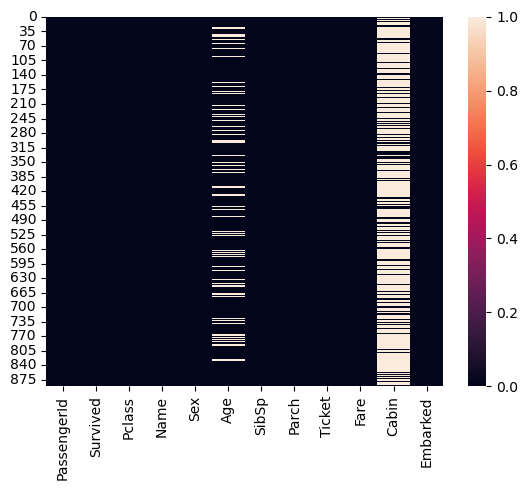

In [23]:
sns.heatmap(df.isnull())

In [24]:
df.duplicated().sum()

0

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**HANDLING NULL VALUES**

* **Cabin** column contains more than 50% missing values ire 687 indicates that a significant portion of the data is unavailable, which can affect the model performance hence,we impute the missing values based on the need.
* **Age** column has 177 null values which is significant as dataset is not much bigger hence interpolation can be used as in this  estimating missing values based on existing nearby values.
* **Embarked** column has 2 null values hence dropping is better option

In [28]:
df.drop('Cabin',axis=1,inplace=True)


In [29]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Age'] = df['Age'].interpolate(method='linear')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<Axes: >

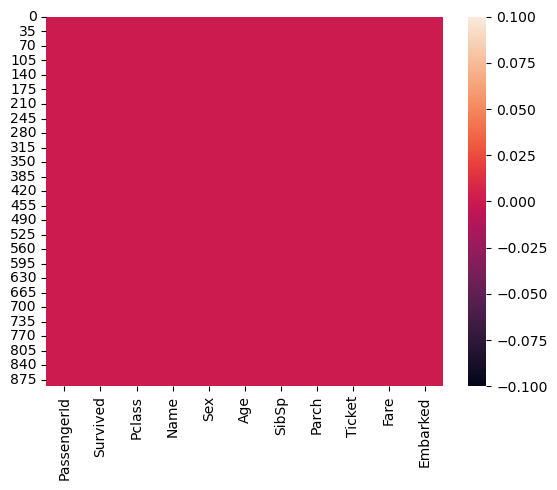

In [31]:
sns.heatmap(df.isnull())

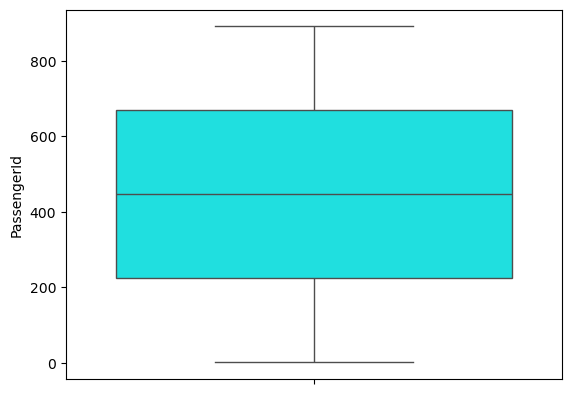

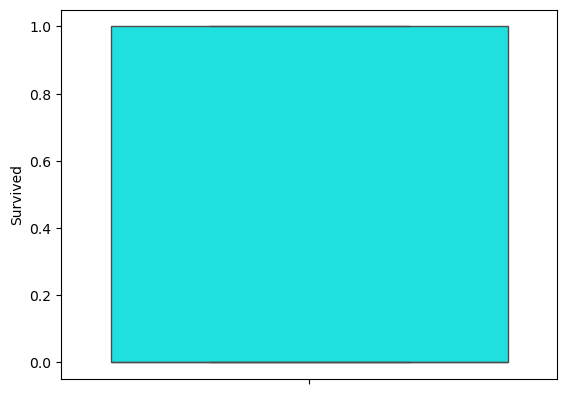

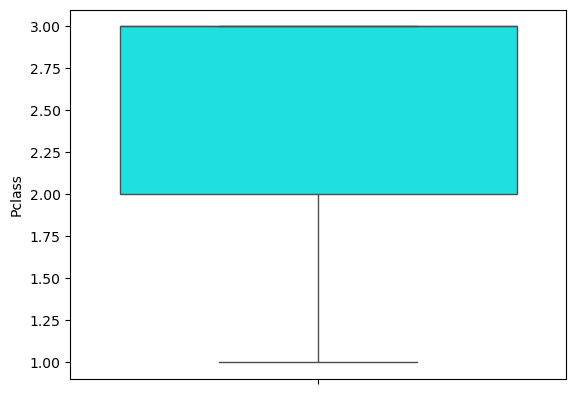

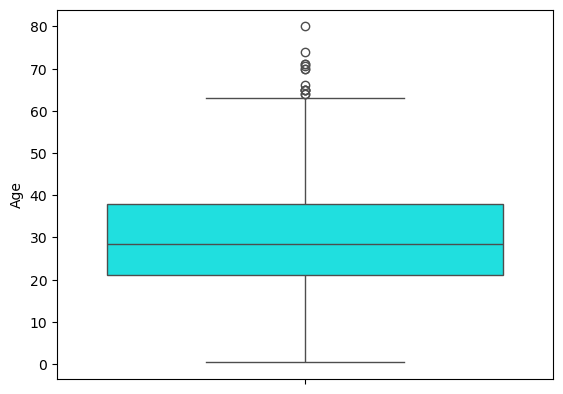

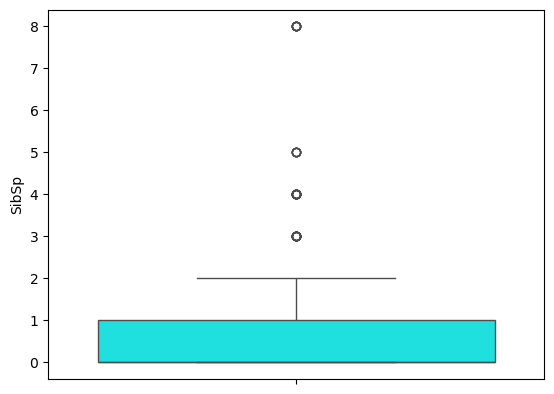

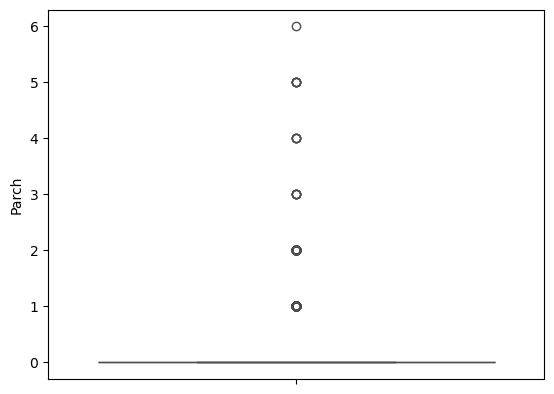

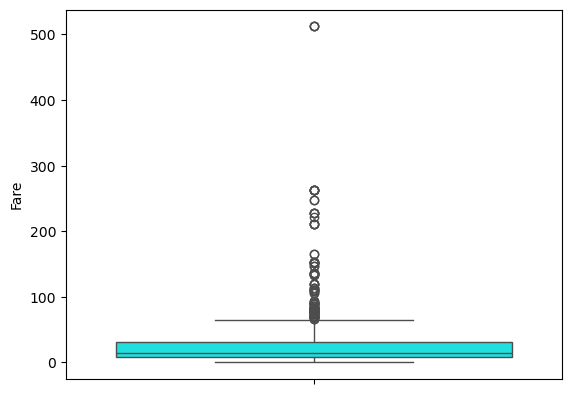

In [32]:
for i in df.columns:
    if df[i].dtypes!="object":
        sns.boxplot(df[i],color="cyan")
        plt.show()

In [33]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
ll = Q1 - 1.5 * IQR
if(ll<0):
    ll=0
else:
    ll=ll
upper_limit = Q3 + 1.5 * IQR
df['Age'] = df['Age'].apply(lambda x: ll if x < ll else x)
df['Age'] = df['Age'].apply(lambda x: upper_limit if x > upper_limit else x)

**VISUALISATION**

<Figure size 800x500 with 0 Axes>

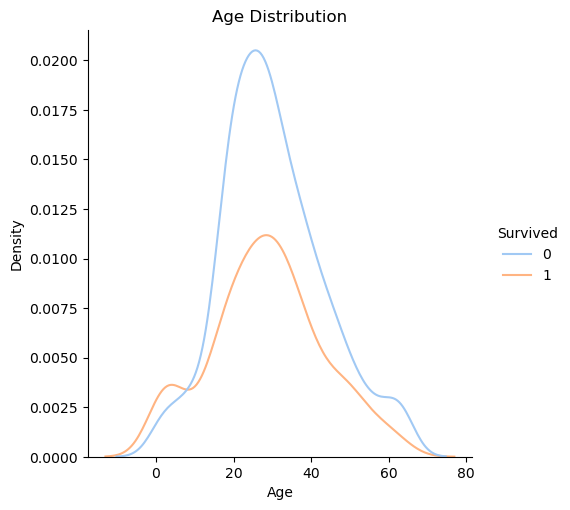

In [35]:
plt.figure(figsize=(8,5))
sns.displot(data=df,x="Age", palette="pastel",kind="kde",hue="Survived")
plt.title("Age Distribution")
plt.show()

* The age of dead and survived people is almost 30 years

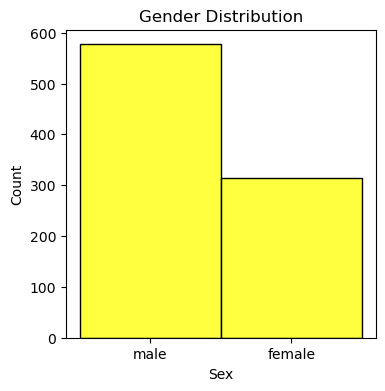

In [37]:
plt.figure(figsize=(4, 4))
sns.histplot(data=df,x ="Sex",color="yellow")
plt.title("Gender Distribution")
plt.show()

* there are more male than female

*How many of the men and women survived?*

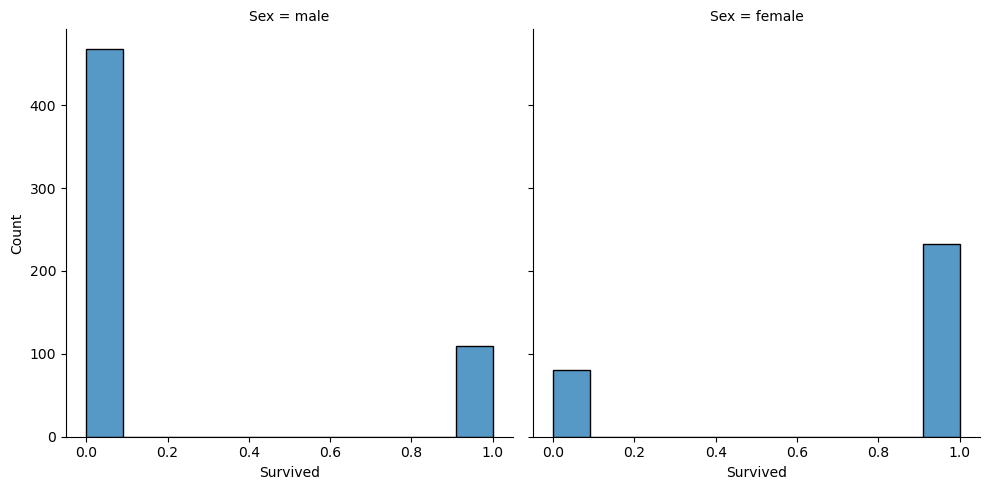

In [40]:
sns.displot(data =df, x = "Survived", col = "Sex")
plt.show()

* the survival rate of women is more than men
* the death rate of male is more

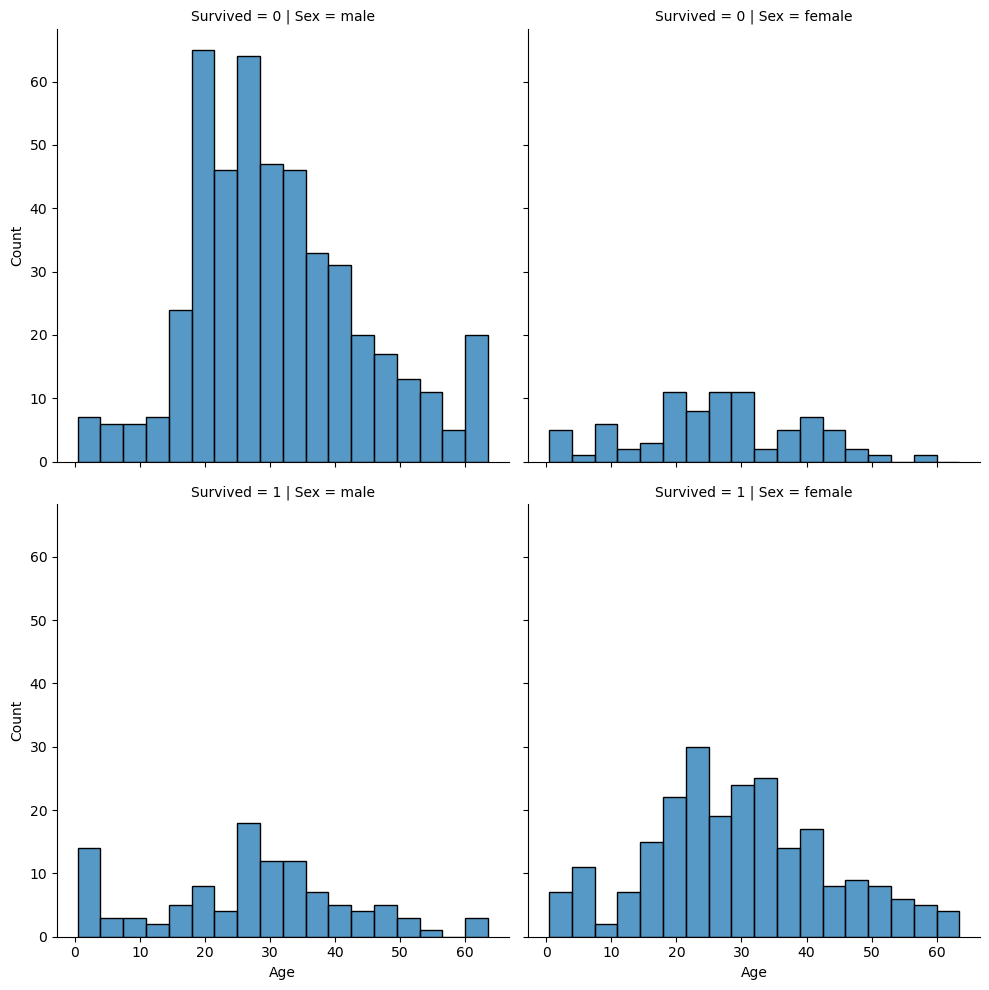

In [42]:
sns.displot(data = df, x = "Age", col = "Sex", row = "Survived")
plt.show()

* The most people are between 20 and 40 years old and The most of died peope were also between 20 and 40 years old in Titanic.



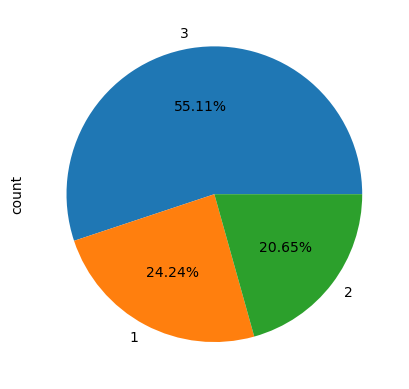

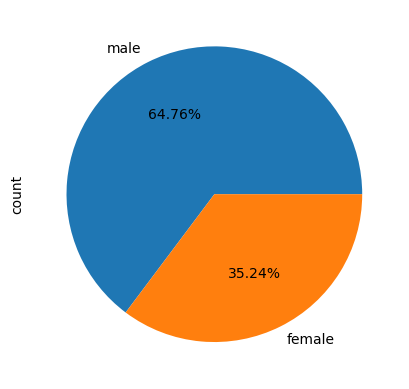

In [44]:
for i in ["Pclass","Sex"]:
        df[i].value_counts().plot.pie(autopct='%.2f%%')
        plt.show()

* There is imbalance in dataset. Over 55.11% of the passengers belong to Class 3, while the combined percentage for Class 1 and Class 2 is less than 55.11%.This disproportionate representation of Class 3 could have an impact the outcomes of any predictive models.
It is crucial to address this imbalance during the data preparation phase. Techniques such as resampling or adjusting performance metrics can help us
* The Sex feature there higher proportion of passengers are male compared to female.
This gender imbalance may affect model predictions as survival rates differed between males and females. Historical records suggest that females had a higher chance of survival due to the
"Women and Children First" policy.

<Axes: xlabel='Pclass', ylabel='count'>

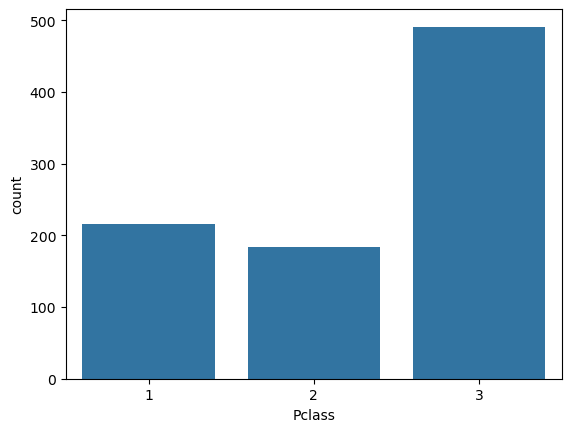

In [46]:
sns.countplot(x='Pclass',data=df)

* First class are 312 people, middle class are 240 and third class are 554.



<Axes: xlabel='Pclass', ylabel='count'>

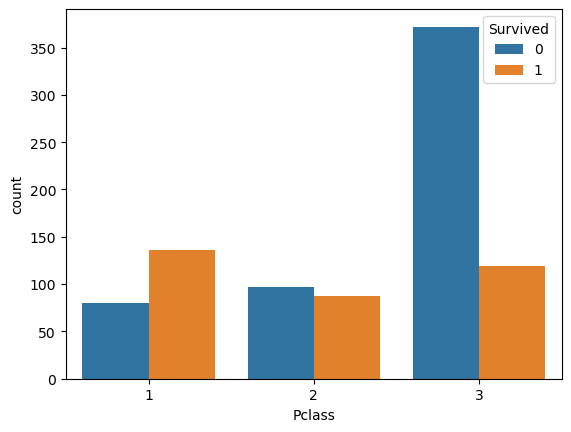

In [48]:
sns.countplot(x='Pclass',hue='Survived',data=df)

* max dead are from pclass 3 and max survivor are from pclass1

<Axes: xlabel='Survived', ylabel='count'>

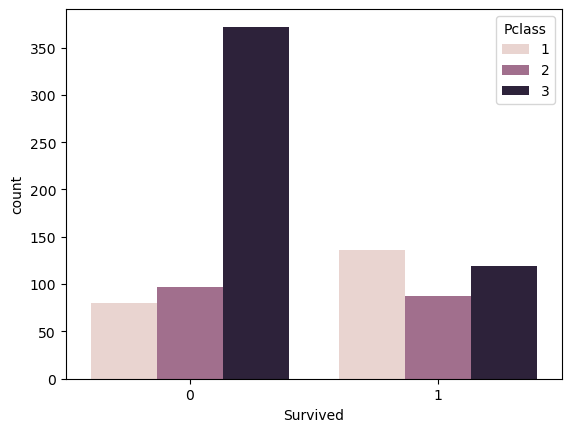

In [50]:
sns.countplot(x='Survived',data=df,hue='Pclass')

* The Pclass 3 group, which represents third-class passengers, has the highest proportion of non-survivors compared to the other classes. 
Despite a large number of third-class passengers being present in the dataset, a significant portion of them did not survive.
This observation highlights a potential disparity in survival rates based on passenger class, with Pclass 3 showing a notably lower survival rate compared to Pclass 1 (first-class) and Pclass 2 (second-class).

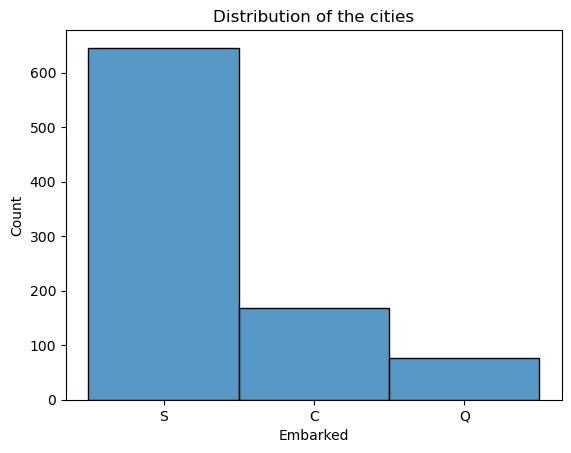

In [52]:
sns.histplot(data = df, x = "Embarked")
plt.title("Distribution of the cities")
plt.show()

* The most people boardered the ship from Southampton.

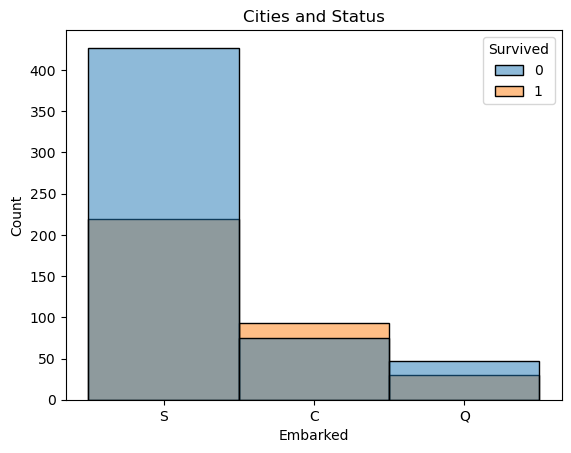

In [54]:
sns.histplot(data = df, x = "Embarked", hue = "Survived")
plt.title("Cities and Status")
plt.show()

* The most of the people who survived are from Southampton.

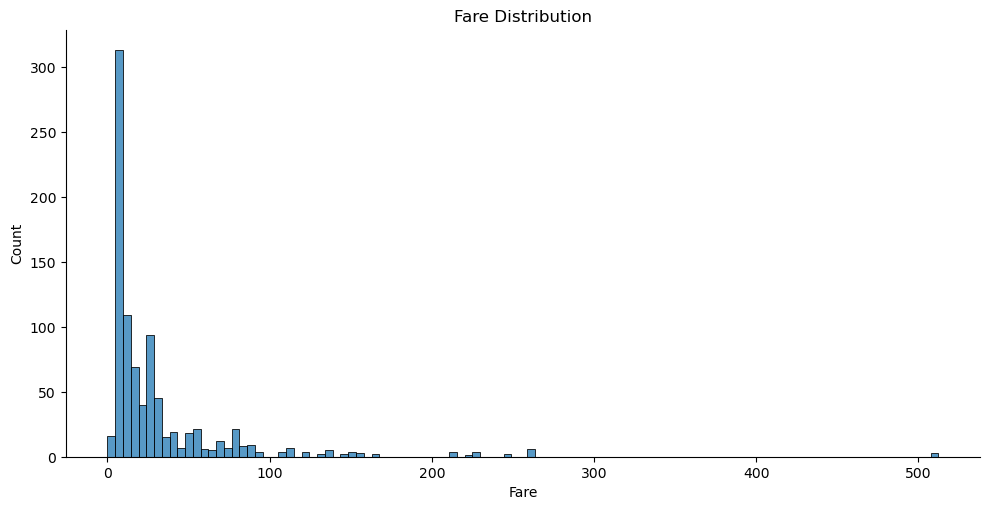

In [56]:
sns.displot(data = df, x = "Fare", aspect = 2)
plt.title("Fare Distribution")
plt.show()

* The average fare is $37. The max fare is 512.33 and standard deviation is 55. 
For the most people the fare is under 100.

**ENCODING**

In [59]:
#df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
from sklearn import preprocessing
col=["Embarked","Sex"]
le= preprocessing.LabelEncoder()
for i in col: 
    df[i]= le.fit_transform(df[i])
    print(df[i].unique())

[2 0 1]
[1 0]


**SPLITTING THE DATASET**

In [61]:
X=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
print(X)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    1  22.0      1      0   7.2500         2
1         1    0  38.0      1      0  71.2833         0
2         3    0  26.0      0      0   7.9250         2
3         1    0  35.0      1      0  53.1000         2
4         3    1  35.0      0      0   8.0500         2
..      ...  ...   ...    ...    ...      ...       ...
886       2    1  27.0      0      0  13.0000         2
887       1    0  19.0      0      0  30.0000         2
888       3    0  22.5      1      2  23.4500         2
889       1    1  26.0      0      0  30.0000         0
890       3    1  32.0      0      0   7.7500         1

[891 rows x 7 columns]


In [62]:
Y=df["Survived"]

**BUILDING MODEL**

# LOGISTIC REGRESSION

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [66]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


In [67]:
model=LogisticRegression(max_iter=200)

In [68]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [69]:
X_train_pred=model.predict(X_train)

In [70]:
train_data_accuracy=accuracy_score(Y_train,X_train_pred)

In [71]:
print("Accuracy Score of training data: ",train_data_accuracy)

Accuracy Score of training data:  0.8047752808988764


In [157]:
X_test_prediction=model.predict(X_test)

In [73]:
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)

In [74]:
print("Accuracy score of testing data:",test_data_accuracy)

Accuracy score of testing data: 0.7653631284916201


In [75]:
LR=LogisticRegression(max_iter=400)


In [76]:
LR.fit(X_train,Y_train)


LogisticRegression(max_iter=400)

In [77]:
LR_accuracy=LR.score(X_test,Y_test)*100
print(LR_accuracy)

76.53631284916202


In [161]:
#y_pred = model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(Y_test, X_test_prediction))


Classification Report:

              precision    recall  f1-score   support

           0       0.53      0.56      0.55       100
           1       0.41      0.38      0.39        79

    accuracy                           0.48       179
   macro avg       0.47      0.47      0.47       179
weighted avg       0.48      0.48      0.48       179



In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#features = [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       #'Parch', 'Fare', 'Cabin', 'Embarked']

X = df[[ 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]
y = df['Survived']
#X_test = df[features]


print(X.shape,y.shape)

(891, 7) (891,)


In [79]:
# 7. Split Data for Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [80]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [81]:

y_pred = model.predict(X_test)
print("Validation Accuracy:", accuracy_score(y_test, y_pred))


Validation Accuracy: 0.8435754189944135


In [82]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [83]:
model.fit(X, y)
predictions = model.predict(X)

Text(0.5, 1.0, 'Feature Importances')

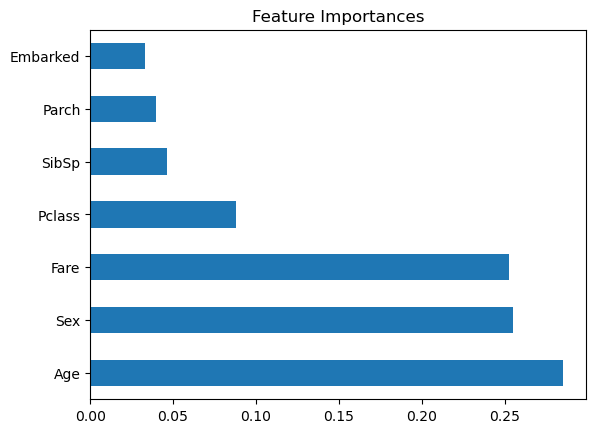

In [84]:
#Feature Importance Visualization
importances = model.feature_importances_
feat_importances = pd.Series(importances,index=["Pclass","Sex","Age" ,"SibSp","Parch","Fare",  "Embarked"])
feat_importances.nlargest(8).plot(kind='barh')
plt.title('Feature Importances')


In [85]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)


array([0.78212291, 0.78651685, 0.84831461, 0.80337079, 0.84269663])

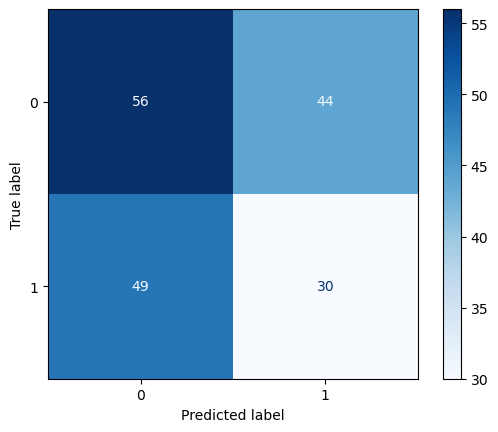

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Score: 0.8272136314389836


In [88]:
from sklearn.metrics import classification_report

y_pred_best = best_rf.predict(X_test)

print("Test Accuracy:", best_rf.score(X_test, Y_test))
print("Classification Report:\n", classification_report(Y_test, y_pred_best))


Test Accuracy: 0.5083798882681564
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.65      0.60       100
           1       0.43      0.33      0.37        79

    accuracy                           0.51       179
   macro avg       0.49      0.49      0.48       179
weighted avg       0.50      0.51      0.50       179



**LOGISTIC REGRESSION GIVES ACCURACY SCORE OF 76% WHEREAS RANDOMFOREST ACCURACY IS 84%**